https://github.com/fastai/fastai/blob/master/courses/dl2/pascal-multi.ipynb

In [0]:
!pip install torchtext==0.2.3

In [0]:
!pip install fastai==0.7.0

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [0]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

--2018-11-27 15:29:21--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M   109MB/s    in 4.1s    

2018-11-27 15:29:25 (107 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



In [0]:
!mkdir 'sample_data/data/pascal'

In [0]:
!tar xvf VOCtrainval_06-Nov-2007.tar

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000005.xml
VOCdevkit/VOC2007/Annotations/000007.xml
VOCdevkit/VOC2007/Annotations/000009.xml
VOCdevkit/VOC2007/Annotations/000012.xml
VOCdevkit/VOC2007/Annotations/000016.xml
VOCdevkit/VOC2007/Annotations/000017.xml
VOCdevkit/VOC2007/Annotations/000019.xml
VOCdevkit/VOC2007/Annotations/000020.xml
VOCdevkit/VOC2007/Annotations/000021.xml
VOCdevkit/VOC2007/Annotations/000023.xml
VOCdevkit/VOC2007/Annotations/000024.xml
VOCdevkit/VOC2007/Annotations/000026.xml
VOCdevkit/VOC2007/Annotations/000030.xml
VOCdevkit/VOC2007/Annotations/000032.xml
VOCdevkit/VOC2007/Annotations/000033.xml
VOCdevkit/VOC2007/Annotations/000034.xml
VOCdevkit/VOC2007/Annotations/000035.xml
VOCdevkit/VOC2007/Annotations/000036.xml
VOCdevkit/VOC2007/Annotations/000039.xml
VOCdevkit/VOC2007/Annotations/000041.xml
VOCdevkit/VOC2007/Annotations/000042.xml
VOCdevkit/VOC2007/Annotations/000044.xml
VOCdevkit/VOC2007/Annotations/000046.

In [0]:
!wget http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

--2018-11-27 15:31:16--  http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar [following]
--2018-11-27 15:31:16--  https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/octet-stream]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[===================>] 430.13M  20.9MB/s    in 21s     

2018-11-27 15:31:38 (20.4 MB/s) - ‘VOCtest_06-Nov-2007.tar’ saved [451020800/451020800]



In [0]:
!tar xvf VOCtest_06-Nov-2007.tar

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000001.xml
VOCdevkit/VOC2007/Annotations/000002.xml
VOCdevkit/VOC2007/Annotations/000003.xml
VOCdevkit/VOC2007/Annotations/000004.xml
VOCdevkit/VOC2007/Annotations/000006.xml
VOCdevkit/VOC2007/Annotations/000008.xml
VOCdevkit/VOC2007/Annotations/000010.xml
VOCdevkit/VOC2007/Annotations/000011.xml
VOCdevkit/VOC2007/Annotations/000013.xml
VOCdevkit/VOC2007/Annotations/000014.xml
VOCdevkit/VOC2007/Annotations/000015.xml
VOCdevkit/VOC2007/Annotations/000018.xml
VOCdevkit/VOC2007/Annotations/000022.xml
VOCdevkit/VOC2007/Annotations/000025.xml
VOCdevkit/VOC2007/Annotations/000027.xml
VOCdevkit/VOC2007/Annotations/000028.xml
VOCdevkit/VOC2007/Annotations/000029.xml
VOCdevkit/VOC2007/Annotations/000031.xml
VOCdevkit/VOC2007/Annotations/000037.xml
VOCdevkit/VOC2007/Annotations/000038.xml
VOCdevkit/VOC2007/Annotations/000040.xml
VOCdevkit/VOC2007/Annotations/000043.xml
VOCdevkit/VOC2007/Annotations/000045.

In [0]:
!wget http://pjreddie.com/media/files/VOCdevkit_08-Jun-2007.tar

URL transformed to HTTPS due to an HSTS policy
--2018-11-27 15:32:00--  https://pjreddie.com/media/files/VOCdevkit_08-Jun-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256000 (250K) [application/octet-stream]
Saving to: ‘VOCdevkit_08-Jun-2007.tar’

VOCdevkit_08-Jun-20 100%[===================>] 250.00K   637KB/s    in 0.4s    

2018-11-27 15:32:01 (637 KB/s) - ‘VOCdevkit_08-Jun-2007.tar’ saved [256000/256000]



In [0]:
!tar xvf VOCdevkit_08-Jun-2007.tar

VOCdevkit/
VOCdevkit/create_segmentations_from_detections.m
VOCdevkit/devkit_doc.pdf
VOCdevkit/example_classifier.m
VOCdevkit/example_detector.m
VOCdevkit/example_layout.m
VOCdevkit/example_segmenter.m
VOCdevkit/local/
VOCdevkit/local/VOC2006/
VOCdevkit/local/VOC2006/dummy
VOCdevkit/local/VOC2007/
VOCdevkit/local/VOC2007/dummy
VOCdevkit/results/
VOCdevkit/results/VOC2006/
VOCdevkit/results/VOC2006/Main/
VOCdevkit/results/VOC2006/Main/dummy
VOCdevkit/results/VOC2007/
VOCdevkit/results/VOC2007/Layout/
VOCdevkit/results/VOC2007/Layout/dummy
VOCdevkit/results/VOC2007/Main/
VOCdevkit/results/VOC2007/Main/dummy
VOCdevkit/results/VOC2007/Segmentation/
VOCdevkit/results/VOC2007/Segmentation/dummy
VOCdevkit/viewanno.m
VOCdevkit/viewdet.m
VOCdevkit/VOCcode/
VOCdevkit/VOCcode/PASemptyobject.m
VOCdevkit/VOCcode/PASemptyrecord.m
VOCdevkit/VOCcode/PASerrmsg.m
VOCdevkit/VOCcode/PASreadrecord.m
VOCdevkit/VOCcode/PASreadrectxt.m
VOCdevkit/VOCcode/VOCevalcls.m
VOCdevkit/VOCcode/VOCevaldet.m
VOCdevkit/VO

In [0]:
!ls VOCdevkit/VOC2007

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


In [0]:
!mv  VOCdevkit sample_data/data/pascal

In [0]:
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip

--2018-11-27 15:32:34--  https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1998182 (1.9M) [application/zip]
Saving to: ‘PASCAL_VOC.zip’

PASCAL_VOC.zip      100%[===================>]   1.91M  --.-KB/s    in 0.02s   

2018-11-27 15:32:35 (87.1 MB/s) - ‘PASCAL_VOC.zip’ saved [1998182/1998182]



In [0]:
import zipfile

zip_ref = zipfile.ZipFile('PASCAL_VOC.zip', 'r')
zip_ref.extractall('sample_data/data/pascal')
zip_ref.close()

In [0]:
!mv  sample_data/data/pascal/PASCAL_VOC/*.json sample_data/data/pascal/

In [0]:
!mv VOCtrainval_06-Nov-2007.tar sample_data/data/pascal/

In [0]:
!mv PASCAL_VOC.zip sample_data/data/pascal/

In [0]:
!ls sample_data/data/pascal/

pascal_test2007.json   pascal_val2007.json  PASCAL_VOC.zip
pascal_train2007.json  pascal_val2012.json  VOCdevkit
pascal_train2012.json  PASCAL_VOC	    VOCtrainval_06-Nov-2007.tar


In [0]:
!mkdir sample_data/data/pascal/VOCdevkit

mkdir: cannot create directory ‘sample_data/data/pascal/VOCdevkit’: File exists


In [0]:
!mkdir sample_data/data/pascal/models

In [0]:
!mkdir sample_data/data/pascal/src

In [0]:
!mkdir sample_data/data/pascal/tmp

In [0]:
PATH = Path('sample_data/data/pascal')
list(PATH.iterdir())

[PosixPath('sample_data/data/pascal/VOCdevkit'),
 PosixPath('sample_data/data/pascal/PASCAL_VOC.zip'),
 PosixPath('sample_data/data/pascal/tmp'),
 PosixPath('sample_data/data/pascal/pascal_val2012.json'),
 PosixPath('sample_data/data/pascal/pascal_val2007.json'),
 PosixPath('sample_data/data/pascal/src'),
 PosixPath('sample_data/data/pascal/pascal_test2007.json'),
 PosixPath('sample_data/data/pascal/VOCtrainval_06-Nov-2007.tar'),
 PosixPath('sample_data/data/pascal/models'),
 PosixPath('sample_data/data/pascal/pascal_train2012.json'),
 PosixPath('sample_data/data/pascal/PASCAL_VOC'),
 PosixPath('sample_data/data/pascal/pascal_train2007.json')]

In [0]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [0]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [0]:
trn_j[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [0]:
trn_j[CATEGORIES][:4]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [0]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [0]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/ImageSets')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [0]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/JPEGImages/003160.jpg'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/JPEGImages/006097.jpg'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/JPEGImages/000935.jpg'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/JPEGImages/008608.jpg'),
 PosixPath('sample_data/data/pascal/VOCdevkit/VOC2007/JPEGImages/006071.jpg')]

In [0]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [0]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [0]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [0]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [0]:
cats[7]

'car'

In [0]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [0]:
cats[15],cats[13]

('person', 'horse')

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [0]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [0]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

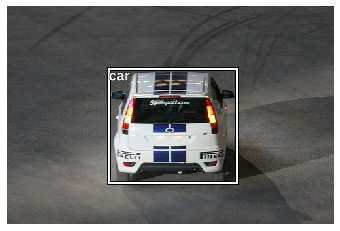

In [0]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


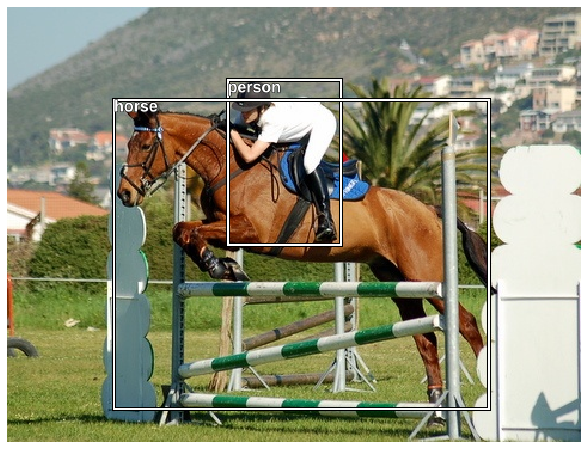

In [0]:
draw_idx(17)


**Largest item classifier**



In [0]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [0]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

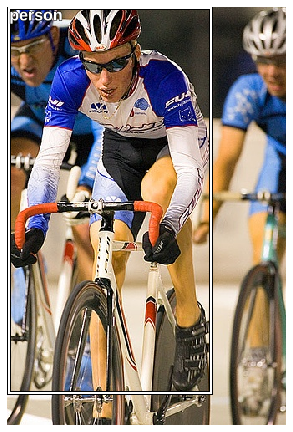

In [0]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)


In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [0]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [0]:
f_model = resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on,  crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [0]:
x,y=next(iter(md.val_dl))

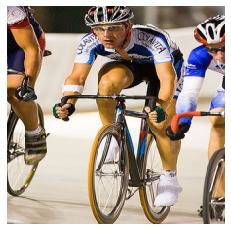

In [0]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [0]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 25295990.82it/s]


In [0]:
lrf=learn.lr_find(1e-5,100)

 78%|███████▊  | 25/32 [00:20<00:02,  3.40it/s, loss=13.9]

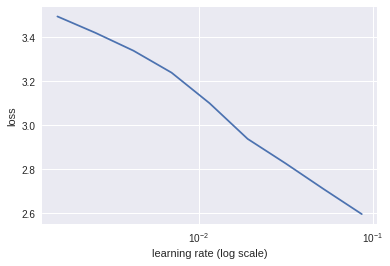

In [0]:
learn.sched.plot()

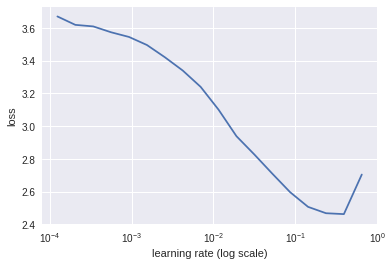

In [0]:


learn.sched.plot(n_skip=5, n_skip_end=1)



In [0]:
lr = 2e-2

In [0]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.031795   0.704748   0.81      


[array([0.70475]), 0.8099999990463257]

In [0]:
lrs = np.array([lr/1000,lr/100,lr])

In [0]:
learn.freeze_to(-2)

 84%|████████▍ | 27/32 [00:23<00:02,  1.83it/s, loss=3.53]

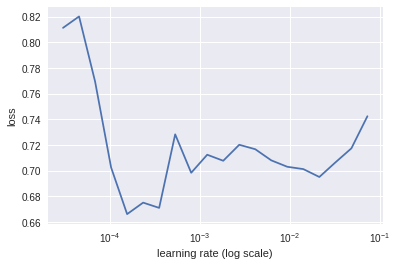

In [0]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [0]:
learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.694114   0.66949    0.822     


[array([0.66949]), 0.8219999995231628]

In [0]:
learn.unfreeze()

In [0]:
learn.fit(lrs/5, 1, cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.547625   0.625673   0.818     
    1      0.405868   0.589518   0.83      


[array([0.58952]), 0.8300000009536743]

In [0]:
learn.save('clas_one')

In [0]:
learn.load('clas_one')

In [0]:


x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)



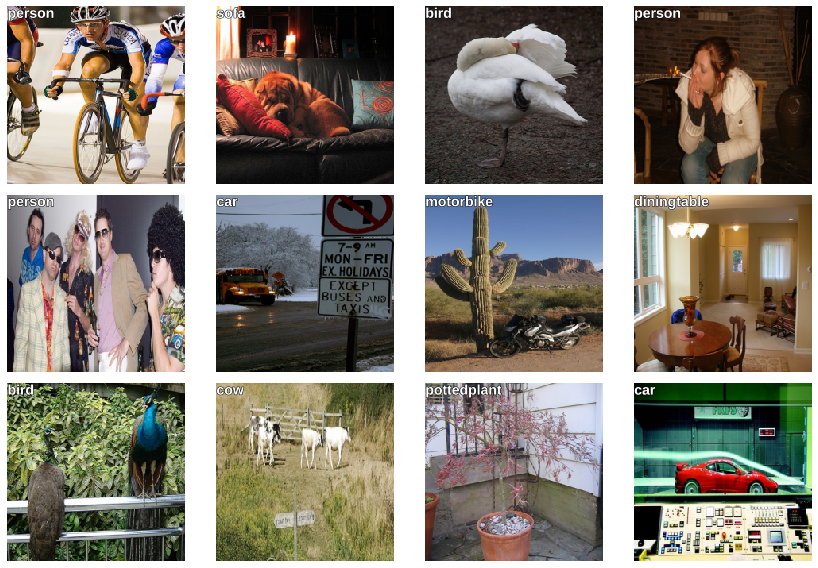

In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()


**Bbox only**

In [0]:
BB_CSV = PATH/'tmp/bb.csv'

In [0]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [0]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
augs = [RandomFlip(), 
        RandomRotate(30),
        RandomLighting(0.1,0.1)]

In [0]:


tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)



[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]


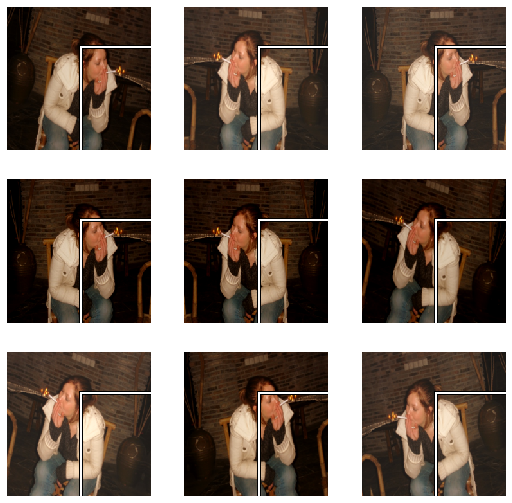

In [0]:


idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)



In [0]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 37.  21. 147. 202.]
[ 38.  20. 150. 203.]
[ 43.  23. 142. 200.]
[ 66.  38. 105. 183.]
[ 66.  38. 105. 183.]
[ 50.  17. 144. 206.]
[ 43.  29. 121. 194.]
[ 45.   9. 159. 214.]
[ 40.  21. 147. 202.]


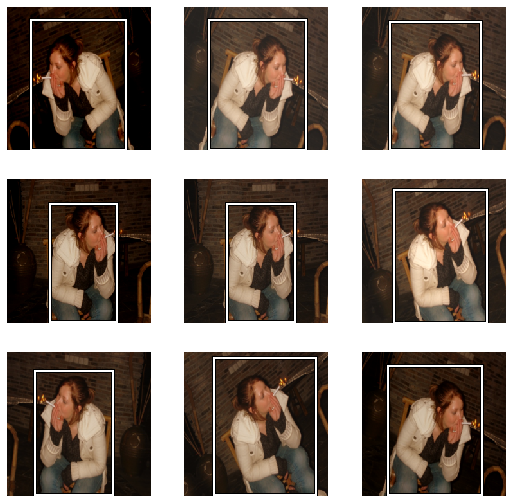

In [0]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [0]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

In [0]:


head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()



In [0]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

 78%|███████▊  | 25/32 [00:26<00:08,  1.22s/it, loss=455]

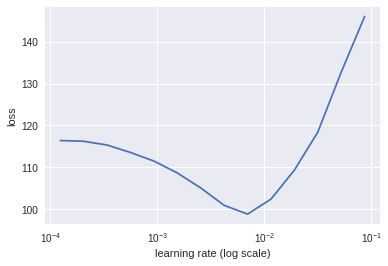

In [0]:


learn.lr_find(1e-5,100)
learn.sched.plot(5)



In [0]:
lr = 2e-3

In [0]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      49.218659  35.240976 
    1      37.754036  28.631732 
    2      31.974851  27.903491 


[array([27.90349])]

In [0]:
lrs = np.array([lr/100,lr/10,lr])

In [0]:
learn.freeze_to(-2)

epoch      trn_loss   val_loss   
    0      65.278254  1018811162063536.1


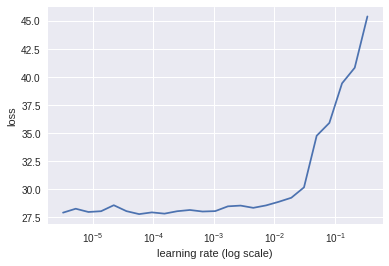

In [0]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [0]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      27.396895  23.932386 
    1      24.212793  21.646913 
    2      20.558191  19.997408 


[array([19.99741])]

In [0]:
learn.freeze_to(-3)

In [0]:
learn.save('reg4')

In [0]:
learn.load('reg4')

In [0]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

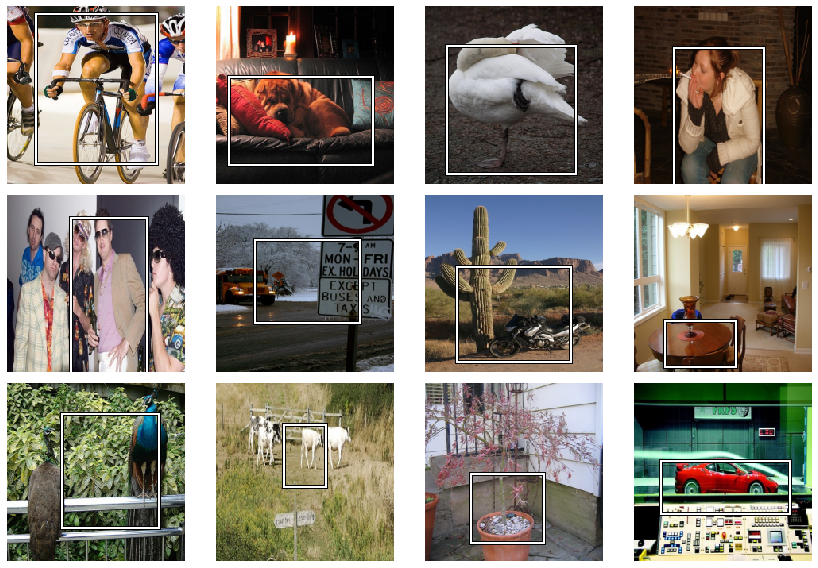

In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()


**Single object detection**

In [0]:
f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
   bs=bs, continuous=True, val_idxs=val_idxs)

In [0]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

In [0]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

In [0]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [0]:
val_ds2[0][1]

(array([  0.,  49., 205., 180.], dtype=float32), 14)

In [0]:


md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2



In [0]:
x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

array([ 52.,  38., 107., 185.])

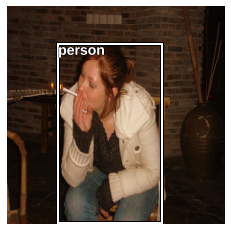

In [0]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

In [0]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [0]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

 97%|█████████▋| 31/32 [00:27<00:00,  2.55it/s, loss=657]

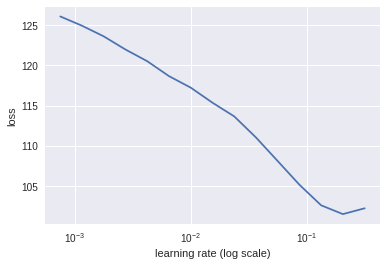

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=1e-2

In [0]:
learn.save('reg1_0')

In [0]:
learn.freeze_to(-2)

In [0]:
lrs = np.array([lr/100, lr/10, lr])

 94%|█████████▍| 30/32 [00:30<00:01,  1.69it/s, loss=673]

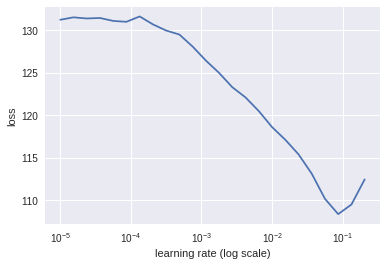

In [0]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)

In [0]:
learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      94.641879  65.441937  0.77       49.595777 
    1      65.586628  37.614894  0.822      24.149184 
    2      47.248131  34.444688  0.818      22.255839 
    3      36.954008  32.214963  0.824      20.469235 
    4      30.482576  31.601732  0.83       19.961783 


[array([31.60173]), 0.8300000009536743, 19.961783264160157]

In [0]:
learn.save('reg1_1')

In [0]:
learn.load('reg1_1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit(lrs/10, 1, cycle_len=10, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      23.013272  33.738779  0.82       21.294054 
    1      22.610162  33.383562  0.806      20.604946 
    2      21.243175  33.670464  0.81       20.357258 
    3      19.784582  32.046523  0.814      19.349013 
    4      18.172043  32.083079  0.814      19.097356 
    5      16.770152  31.236068  0.826      18.723972 
    6      15.896551  31.335125  0.824      18.907534 
    7      14.922458  30.962535  0.812      18.36671  
    8      14.245182  31.578537  0.812      18.458504 
    9      13.641161  31.470354  0.818      18.386438 


[array([31.47035]), 0.8180000028610229, 18.3864377746582]

In [0]:
learn.save('reg1')

In [0]:
learn.load('reg1')

In [0]:
y = learn.predict()
x,_ = next(iter(md.val_dl))

In [0]:
from scipy.special import expit

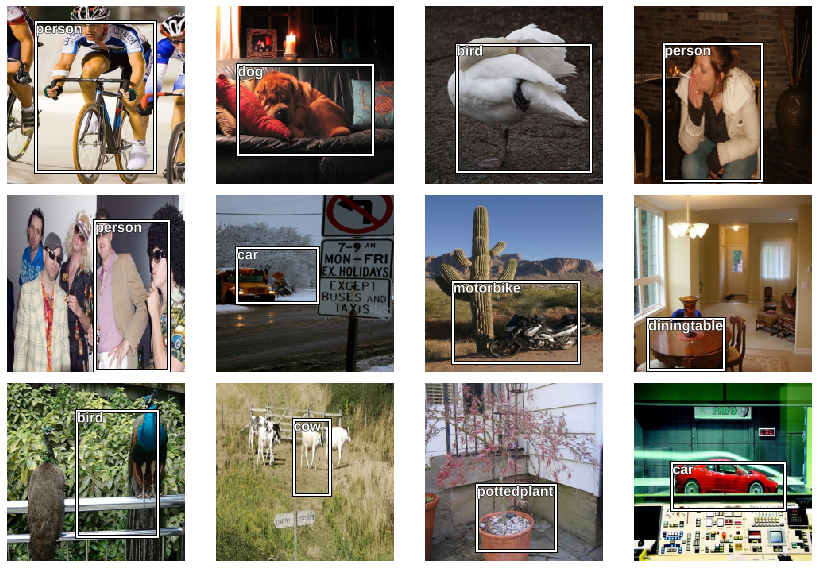

In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[i]
    bb = expit(y[i][:4])*224
    b = bb_hw(bb)
    c = np.argmax(y[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()

### ***END***